# DETERMINE FIRST AND LAST OCCURRENCES

Here we determine for each species in which time units they occur and when they occur for the first and last time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv('../csv/NOW_dataframe_cleaned.csv', index_col=0)

timeUnits = ['old','MN1','MN2','MN3','MN4','MN5','MN6','MN7-8','MN9','MN10','MN11','MN12','MN13','MN14','MN15','MN16','MN17','MQ18','MQ19','recent']
pd.set_option('max_columns', 100)

In [2]:
# create a dataframe showing for each species the number of occurrences at each time bin

# pre-allocate
rowLabels = df['ID'].unique().astype(int)
columnLabels = timeUnits
zeroMatrix = np.zeros((len(rowLabels),len(columnLabels)))
speciesOccurrences = pd.DataFrame(zeroMatrix.copy(), index=rowLabels, columns=columnLabels)
speciesOccurrences.index.name = 'ID'

# calculate occurrences
for ix in speciesOccurrences.index:
    singleSpecies = df.loc[df['ID']==ix]
    for ix2 in singleSpecies.index:
        speciesOccurrences.loc[ix,singleSpecies.loc[ix2,'TIMEUNIT']] += 1
        
display(speciesOccurrences.head())       
display(speciesOccurrences.shape)

,old,MN1,MN2,MN3,MN4,MN5,MN6,MN7-8,MN9,MN10,MN11,MN12,MN13,MN14,MN15,MN16,MN17,MQ18,MQ19,recent
ID,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,12.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,1.0,0.0,0.0,0.0,0.0


(9692, 20)

In [3]:
numberOldOverlapMN = speciesOccurrences.loc[(speciesOccurrences['old']>0) & ((speciesOccurrences.loc[:,'MN1':]>0).any(axis=1))].shape[0]
numberRecentOverlapMN = speciesOccurrences.loc[(speciesOccurrences['recent']>0) & ((speciesOccurrences.loc[:,:'MQ19']>0).any(axis=1))].shape[0]
print('Number of "old" species that also occur in Neogene: ' + str(numberOldOverlapMN))
print('Number of "recent" species that also occur in Neogene: ' + str(numberRecentOverlapMN))

Number of "old" species that also occur in Neogene: 164
Number of "recent" species that also occur in Neogene: 47


In [4]:
# define timeunit as a categorical variable with given order (useful in the following)
df['TIMEUNIT'] = pd.Categorical(df['TIMEUNIT'], categories=timeUnits, ordered=True)

In [5]:
# create a dataframe showing for each species the time bin of first and last occurrence

# pre-allocate
speciesFirstOccurrence = pd.DataFrame(zeroMatrix.copy(), index=rowLabels, columns=columnLabels)
speciesFirstOccurrence.index.name = 'ID'
speciesLastOccurrence = pd.DataFrame(zeroMatrix.copy(), index=rowLabels, columns=columnLabels)
speciesLastOccurrence.index.name = 'ID'

# find first and last occurrence for each species
for ix in speciesFirstOccurrence.index:
    singleSpecies = df.loc[df['ID']==ix]
    firstTimeUnit = singleSpecies['TIMEUNIT'].min()
    speciesFirstOccurrence.loc[ix,firstTimeUnit] = 1
    lastTimeUnit = singleSpecies['TIMEUNIT'].max()
    speciesLastOccurrence.loc[ix,lastTimeUnit] = 1
    
display(speciesFirstOccurrence.head())
display(speciesFirstOccurrence.shape)
display(speciesLastOccurrence.head())
display(speciesLastOccurrence.shape)

,old,MN1,MN2,MN3,MN4,MN5,MN6,MN7-8,MN9,MN10,MN11,MN12,MN13,MN14,MN15,MN16,MN17,MQ18,MQ19,recent
ID,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(9692, 20)

,old,MN1,MN2,MN3,MN4,MN5,MN6,MN7-8,MN9,MN10,MN11,MN12,MN13,MN14,MN15,MN16,MN17,MQ18,MQ19,recent
ID,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


(9692, 20)

In [6]:
# data on occurrences

indexLabels = ['first occurrences','last occurrences','all occurrences','proportion of first occurrences','proportion of last occurrences']
speciesOccurrenceProportions = pd.DataFrame(np.nan, index=indexLabels, columns=columnLabels)
speciesOccurrenceProportions.loc['first occurrences',:] = (speciesOccurrences*speciesFirstOccurrence).sum(axis=0)
speciesOccurrenceProportions.loc['last occurrences',:] = (speciesOccurrences*speciesLastOccurrence).sum(axis=0)
speciesOccurrenceProportions.loc['all occurrences',:] = speciesOccurrences.sum(axis=0)
speciesOccurrenceProportions.loc['proportion of first occurrences',:] = speciesOccurrenceProportions.loc['first occurrences',:] / speciesOccurrenceProportions.loc['all occurrences',:]
speciesOccurrenceProportions.loc['proportion of last occurrences',:] = speciesOccurrenceProportions.loc['last occurrences',:] / speciesOccurrenceProportions.loc['all occurrences',:]
display(speciesOccurrenceProportions)

,old,MN1,MN2,MN3,MN4,MN5,MN6,MN7-8,MN9,MN10,MN11,MN12,MN13,MN14,MN15,MN16,MN17,MQ18,MQ19,recent
first occurrences,8322.000000,116.000000,759.000000,1304.000000,966.000000,1062.000000,532.000000,677.000000,682.000000,375.000000,476.000000,444.000000,1106.000000,300.000000,1524.000000,640.000000,404.000000,2571.000000,337.000000,77.000000
last occurrences,7811.000000,38.000000,486.000000,892.000000,780.000000,847.000000,760.000000,806.000000,666.000000,440.000000,390.000000,378.000000,1439.000000,191.000000,945.000000,753.000000,586.000000,2630.000000,1566.000000,141.000000
all occurrences,8322.000000,186.000000,1179.000000,2614.000000,2946.000000,4124.000000,2337.000000,2555.000000,2150.000000,1468.000000,1552.000000,1846.000000,2657.000000,801.000000,2809.000000,2145.000000,1649.000000,5026.000000,1811.000000,141.000000
proportion of first occurrences,1.000000,0.623656,0.643766,0.498852,0.327902,0.257517,0.227642,0.264971,0.317209,0.255450,0.306701,0.240520,0.416259,0.374532,0.542542,0.298368,0.244997,0.511540,0.186085,0.546099
proportion of last occurrences,0.938596,0.204301,0.412214,0.341239,0.264766,0.205383,0.325203,0.315460,0.309767,0.299728,0.251289,0.204767,0.541588,0.238452,0.336419,0.351049,0.355367,0.523279,0.864716,1.000000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


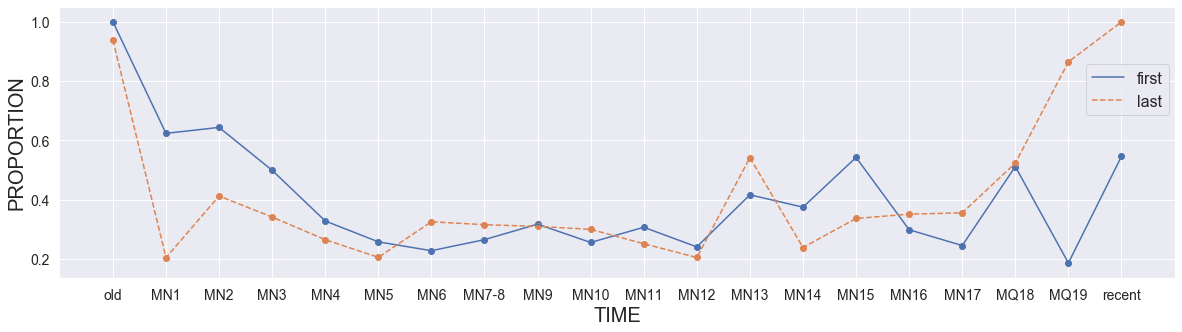

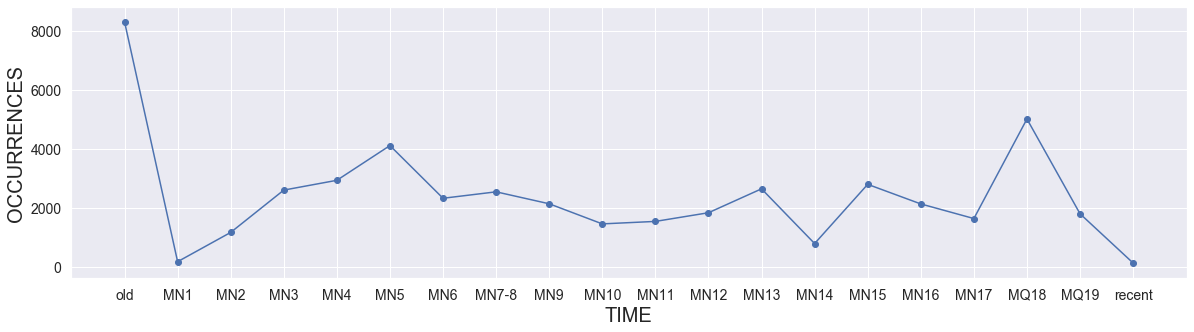

In [7]:
label_fontsize = 20
tick_fontsize = 14
legend_fontsize = 16

fig, ax = plt.subplots(figsize=(20,5))
plt.plot(speciesOccurrenceProportions.loc['proportion of first occurrences',:])
plt.plot(speciesOccurrenceProportions.loc['proportion of last occurrences',:], linestyle='dashed')
plt.scatter(np.arange(0,20,1),speciesOccurrenceProportions.loc['proportion of first occurrences',:])
plt.scatter(np.arange(0,20,1),speciesOccurrenceProportions.loc['proportion of last occurrences',:])
#plt.title('PROPORTION OF FIRST/LAST OCCURRENCES')
plt.xlabel('TIME', fontsize=label_fontsize)
plt.ylabel('PROPORTION', fontsize=label_fontsize)
plt.legend(('first','last'), loc=(0.92,0.6), fontsize=legend_fontsize)
ax.tick_params(labelsize=tick_fontsize)
#filepath = '../figures/proportion_first_occurrences_all.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
plt.plot(speciesOccurrenceProportions.loc['all occurrences',:])
plt.scatter(np.arange(0,20,1),speciesOccurrenceProportions.loc['all occurrences',:])
#plt.title('ALL OCCURRENCES')
plt.xlabel('TIME', fontsize=label_fontsize)
plt.ylabel('OCCURRENCES', fontsize=label_fontsize)
ax.tick_params(labelsize=tick_fontsize)
#filepath = '../figures/all_occurrences_all.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

In [8]:
speciesFirstOccurrence.to_csv('../csv/speciesFirstOccurrence.csv')
speciesLastOccurrence.to_csv('../csv/speciesLastOccurrence.csv')